# Usage

**Authors:** Judith Korth and Hannu Parviainen </br>
**Edited:** 4 March 2025

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
from cheopslcs import LCSim

## Simulator setup

The light curve simulation is done using `cheopslcs.LCSim` class, which is initialised by giving the observing window width in hours, exposure time in seconds, and the white noise standard deviation. Optionally, we can also give the limb darkening model used by the transit model (one of: `constant`, `linear`, `quadratic`, `nonlinear`, `general`, `power-2`, and `power-2-pm`, see the [PyTransit documentation](https://github.com/hpparvi/PyTransit/blob/9a39e7162b93e9f61f8a79409606b8c1649fc750/doc/source/notebooks/models/roadrunner/roadrunner_model_example_1.ipynb) for details).

In [32]:
lcs = LCSim(window_width=5.0, exp_time=60, white_noise=1e-4)

## How to simulate a transit

After the simulator has been set up, we can create light curves by calling the simulator as a function. A simple transit can be created by giving the 

- planet-star radius ratio,
- zero epoch,
- orbital period in days,
- semi-major axis divided by the stellar radius,
- impact parameter, and
- limb darkening coefficients specific to the used limb-darkening model

as arguments, and the call will return two NumPy arrays containing mid-exposure times and fluxes.

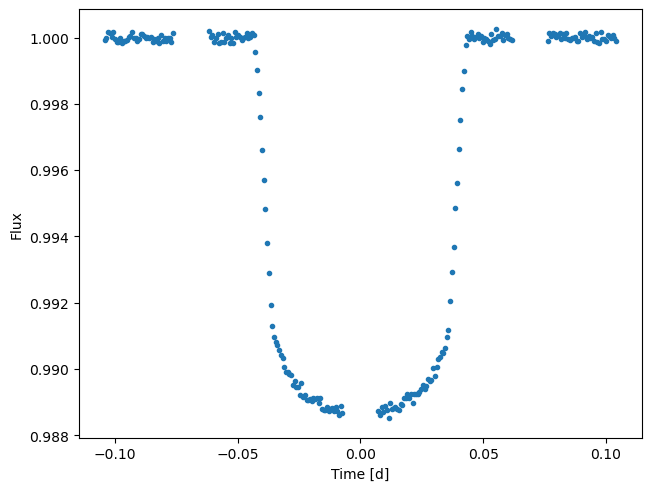

In [33]:
time, flux = lcs(radius_ratio=0.1, zero_epoch=0.0, period=2.0,
                 scaled_semi_major_axis=8.0, impact_parameter=0.1,
                limb_darkening=[0.2, 0.3])

fig, ax = plt.subplots(1, 1, constrained_layout=True)
ax.plot(time, flux, '.')
plt.setp(ax, xlabel='Time [d]', ylabel='Flux');

The resulting light curve contains gaps with a period of CHEOPS's rotation period of 99 minutes. The fractional width and phase of the gaps can be changed with the `efficiency` and `eff_phase` arguments. Both `efficiency` and `eff_phase` range from 0 to 1; `efficiency` has a default value of 0.8, and `eff_phase` defaults to 0.0.

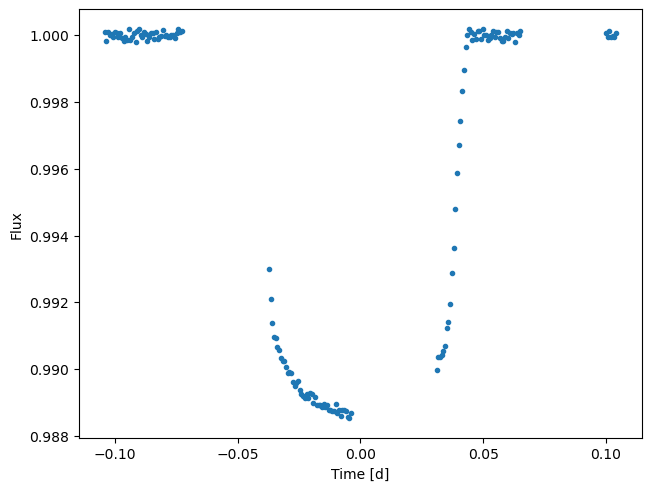

In [34]:
time, flux = lcs(radius_ratio=0.1, zero_epoch=0.0, period=2.0,
                 scaled_semi_major_axis=8.0, impact_parameter=0.1,
                efficiency=0.5, eff_phase=0.2,
                limb_darkening=[0.2, 0.3])

fig, ax = plt.subplots(1, 1, constrained_layout=True)
ax.plot(time, flux, '.')
plt.setp(ax, xlabel='Time [d]', ylabel='Flux');

## How to simulate a full phase curve

A phase curve with a secondary eclipse can be simulated by giving the simulator a non-zero `geometric_albedo` argument. Let's create a long observation of 1.5 days with observing efficiency of 0.6, and also set a non-zero orbital ``eccentricity`` and ``argument_of_periastron`` to create a more interesting light curve (both eccentricity and argument of periastron can be set for simple transit simulations too, but their effect is very small).

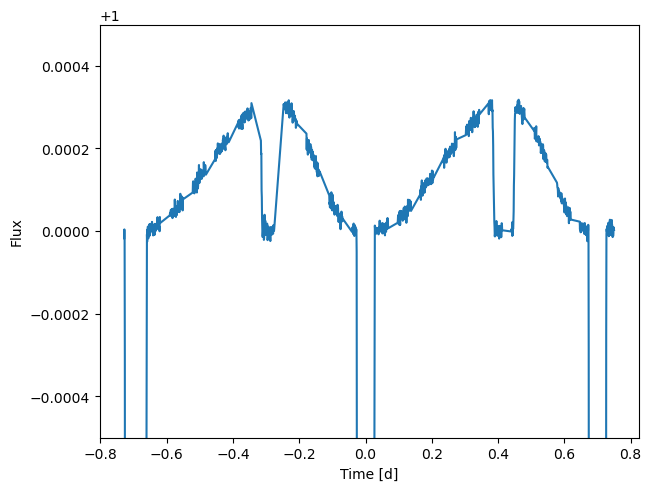

In [46]:
lcs = LCSim(window_width=24*1.5, exp_time=60, white_noise=1e-5)

time, flux = lcs(radius_ratio=0.1, zero_epoch=0.0, period=0.7,
                 scaled_semi_major_axis=4.0, impact_parameter=0.1,
                 eccentricity=0.2, argument_of_periastron=0.23*3.14,
                 geometric_albedo=0.5, limb_darkening=[0.2, 0.3],
                 efficiency=0.6, eff_phase=0.2)

fig, ax = plt.subplots(1, 1, constrained_layout=True)
ax.plot(time, flux, '-')
plt.setp(ax, ylim=(0.9995, 1.0005), xlabel='Time [d]', ylabel='Flux');

---
<center>&copy; 2025 Judith Korth and Hannu Parviainen </center>